In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [85]:
data = pd.read_csv('data/Tweets.txt',sep="\t",header=None)
data.columns = ["text","label"]
print(data.shape)
display(HTML(data.head().to_html()))


(9694, 2)


,text,label
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان,NEUTRAL


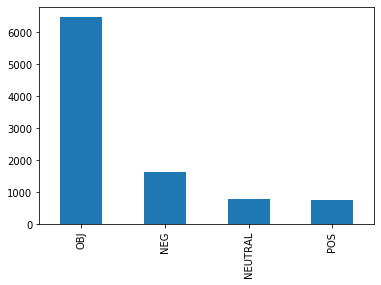

In [86]:
data.label.value_counts().plot.bar()

The plot shows that data is biased to OBJ label so we'll need to augment data for other labels.

# Augment Data

In [94]:

from nltk import sent_tokenize
import pandas as pd
import random
import pyarabic.araby as araby

def tokenize(text):
    '''text: list of text documents'''
    tokenized  = araby.tokenize(text)
    return tokenized

def shuffle_tokenized(text):
    random.shuffle(text)
    newl=list(text)
    shuffled.append(newl)
    return text


In [95]:
augmented = []
reps=[]
for posrev in data.loc[data['label'] == "OBJ"]["text"]:
    tok = tokenize(posrev)
    shuffled= [tok]
    
    #print(ng_rev)
    for i in range(2):
    #generate 11 new reviews
        shuffle_tokenized(shuffled[-1])
       # print(shuffled)
    for k in shuffled:
        '''create new review by joining the shuffled sentences'''
        s = ' '
        new_rev = s.join(k)
        
        if new_rev not in data.text.values:
            df = pd.DataFrame({
                    "label" : ["OBJ"],
                    "text":[new_rev]
                    })
            data = data.append(df, ignore_index = True,sort=False)
            augmented.append(new_rev)
print(len(data.loc[data['label'] == "OBJ"]["text"]))


KeyboardInterrupt: 

In [107]:
augmented = []
reps=[]
for posrev in data.loc[data['label'] == "NEG"]["text"]:
    tok = tokenize(posrev)
    shuffled= [tok]
    
    shuffle_tokenized(shuffled[-1])
       # print(shuffled)
    for k in shuffled:
        '''create new review by joining the shuffled sentences'''
        s = ' '
        new_rev = s.join(k)
        df = pd.DataFrame({
                    "label" : ["NEG"],
                    "text":[new_rev]
                    })
        data = data.append(df, ignore_index = True,sort=False)
        augmented.append(new_rev)
print(len(data.loc[data['label'] == "NEG"]["text"]))

KeyboardInterrupt: 

In [67]:
augmented = []
reps=[]
for posrev in data.loc[data['label'] == "NEUTRAL"]["text"]:
    tok = tokenize(posrev)
    shuffled= [tok]
    shuffle_tokenized(shuffled[-1])
       # print(shuffled)
    for k in shuffled:
        '''create new review by joining the shuffled sentences'''
        s = ' '
        new_rev = s.join(k)
        df = pd.DataFrame({
                    "label" : ["NEUTRAL"],
                    "text":[new_rev]
                    })
        data = data.append(df, ignore_index = True,sort=False)
        augmented.append(new_rev)
print(len(data.loc[data['label'] == "NEUTRAL"]["text"]))

NameError: name 'tokenize' is not defined

In [80]:
data.to_csv('data/AugmentedData2.csv')

# Read Augmented data

In [96]:
data = pd.read_csv('data/AugmentedData2.txt',sep="\t",header=None)
data.columns = ["text","label"]

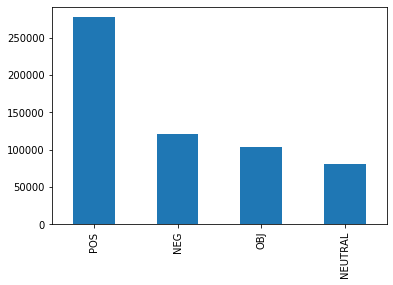

In [108]:
data.label.value_counts().plot.bar()

# Read Reviews DataSet


In [105]:
data = pd.read_csv('data/AugmentedData2.csv',index_col=False)

In [99]:
reviews = reviews[["rating","review"]]
reviewspos = reviews[reviews["rating"]>=4]
reviewsneut = reviews[reviews["rating"] == 3]
reviewsneg = reviews[reviews["rating"]<3]
reviewspos.head()
dfpos = pd.DataFrame(reviewspos.review.values,columns=['text'])
dfpos["label"] = "POS"
data = data.append(dfpos,ignore_index=True,sort=False)
dfpos = pd.DataFrame(reviewsneg.review.values,columns=['text'])
dfpos["label"] = "NEG"

data = data.append(dfpos,ignore_index=True,sort=False)

dfpos = pd.DataFrame(reviewsneut.review.values,columns=['text'])
dfpos["label"] = "NEUTRAL"
data = data.append(dfpos,ignore_index=True,sort=False)


dfpos.head()


,text,label
0,مرضي. . حمام السباحه لايعمل و الاضاءه في الغرف...,NEUTRAL
1,“جيد”. موقع الفندق. اقمت سته ايام والمسبح عليه...,NEUTRAL
2,مقبول. لا شي كل شي مجرد عادي . لم يعجبني عدم ا...,NEUTRAL
3,“الفندق عادي جدا”. . الخدمة ليست على المستوى ا...,NEUTRAL
4,مرضي. خدمة الزبون ومعاملة الطاقم ...والموقع .....,NEUTRAL


In [74]:
print("NEG")
reviewsneg.head()


NEG


,rating,review
1,2,“ممتاز”. النظافة والطاقم متعاون.
19,1,“استغرب تقييم الفندق كخمس نجوم”. لا شي. يستحق ...
48,1,“أسرة اماراتية.”. فندق مبنى على الطراز الحديث،...
77,2,“موظف المسبح سيء جدا”. . موظف المسبح سيء جدامع...
80,1,“اقامة ممتعة”. . الموقع والنظافة


In [64]:

print("NEUT")
reviewsneut.head()

NEUT


,rating,review
6,3,مرضي. . حمام السباحه لايعمل و الاضاءه في الغرف...
18,3,“جيد”. موقع الفندق. اقمت سته ايام والمسبح عليه...
28,3,مقبول. لا شي كل شي مجرد عادي . لم يعجبني عدم ا...
33,3,“الفندق عادي جدا”. . الخدمة ليست على المستوى ا...
36,3,مرضي. خدمة الزبون ومعاملة الطاقم ...والموقع .....


In [66]:
len(reviewspos)

276387